In [ ]:
import numpy as np
import pandas as pd       
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

**Importing data from MNIST**


In [ ]:
from keras.datasets import mnist

In [ ]:
((Xtrain, Ytrain), (Xtest, Ytest)) = mnist.load_data()


# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [ ]:
Xtrain = Xtrain.astype("float32")/255.0
Xtest = Xtest.astype("float32")/255.0
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

In [ ]:
model= Sequential()
model.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model.add(Dense(10))
    model.add(Activation("sigmoid"))
    model.add(BatchNormalization())
model.add(Dense(10,activation="sigmoid"))
model.summary()

Adam Optimization


In [ ]:
from keras.optimizers import Adam

In [ ]:
batch_size = 64
adam = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer =adam, metrics=['accuracy'])
Hyp1 =model.fit(Xtrain, Ytrain, epochs=10, validation_data =(Xtest, Ytest), batch_size=batch_size)


In [ ]:
model.fit(Xtrain,Ytrain, epochs=10,batch_size=batch_size,validation_data=(Xtest,Ytest))

313/313 [==============================] - 1s 2ms/step
[0.0044633  0.9993243  0.8876367  0.9050539  0.13351248 0.01644441
 0.57431865 0.8427205  0.91322523 0.45343208]
1


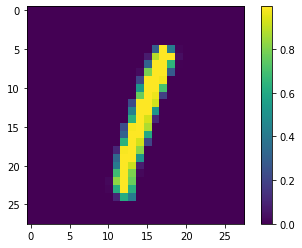

In [ ]:
predictions = model.predict(Xtest)
print(predictions[5])
print(np.argmax(predictions[5]))
plt.figure()
plt.imshow(Xtest[5])
plt.colorbar()
plt.grid(False)
plt.show()

RelU Activation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.datasets import mnist

**Importing data from MNIST**


In [ ]:
((Xtrain, Ytrain), (Xtest, Ytest)) = mnist.load_data()


In [ ]:
Xtrain = Xtrain.astype("float32")/255.0
Xtest = Xtest.astype("float32")/255.0
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

RelU activation function

In [ ]:
model= Sequential()
model.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
model.add(Dense(10,activation="sigmoid"))

Adam Optimization

In [ ]:
batch_size = 64
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(Xtrain,Ytrain, epochs=10,batch_size=batch_size,validation_data=(Xtest,Ytest))

Epoch 1/10
938/938 [==============================] - 10s 7ms/step - loss: 0.4140 - accuracy: 0.8813 - val_loss: 0.3141 - val_accuracy: 0.9073
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3478 - accuracy: 0.8985 - val_loss: 0.2791 - val_accuracy: 0.9174
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3064 - accuracy: 0.9099 - val_loss: 0.2447 - val_accuracy: 0.9276
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2856 - accuracy: 0.9155 - val_loss: 0.2432 - val_accuracy: 0.9292
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2659 - accuracy: 0.9212 - val_loss: 0.2428 - val_accuracy: 0.9252
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2541 - accuracy: 0.9244 - val_loss: 0.2068 - val_accuracy: 0.9392
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2424 - accuracy: 0.9285 - val_loss: 0.2203 - val_accuracy: 0.9332
Epoch

In [ ]:
predictions = model.predict(Xtest)
print(predictions[5])
print(np.argmax(predictions[5]))
plt.figure()
plt.imshow(Xtest[5])
plt.colorbar()
plt.grid(False)
plt.show()